# Kaggle - Housing Data Exploration

This notebook will be used to take notes on data exploration before a new notebook will be started which does the data cleaning and machine learning part

In [135]:
# loading the Kaggle Housing train dataset for exploration
# The datase is already split in train and test. We will only explore the train set

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 12, 8

filepath = "data/train.csv"

housing = pd.read_csv(filepath, index_col='Id')
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [50]:
# checking first 40 null features
housing.isnull().sum()[:40]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
dtype: int64

In [51]:
# checking first 40 null features
housing.isnull().sum()[40:]

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [52]:
# Taking a look LotFrontage which has alot of null variables (LotFrontage: Linear feet of street connected to property)
housing.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [69]:
# Tried out a few different crosstabs, and could not find any correlation to the missing values.
pd.crosstab(housing.LotFrontage.isnull(), housing.Neighborhood, margins=True).style.background_gradient(cmap='summer_r')

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,All
LotFrontage,,,,,,,,,,,,,,,,,,,,,,,,,,
False,14,2,16,51,13,126,41,92,49,34,15,36,186,7,45,33,76,109,23,48,50,78,20,30,7,1201
True,3,0,0,7,15,24,10,8,30,3,2,13,39,2,28,8,1,4,2,26,9,8,5,8,4,259
All,17,2,16,58,28,150,51,100,79,37,17,49,225,9,73,41,77,113,25,74,59,86,25,38,11,1460


In [102]:
# Filling with Mean values could therefore be better than filling with 0. Checking if neighborhood has an effect on the mean value
#pd.crosstab(housing.LotFrontage.mean(), [housing.Neighborhood, housing.LotConfig] , margins=True).style.background_gradient(cmap='summer_r')



In [72]:
pd.crosstab(housing.Neighborhood, housing.LotConfig, margins=True).style.background_gradient(cmap='summer_r')

LotConfig,Corner,CulDSac,FR2,FR3,Inside,All
Neighborhood,,,,,,
Blmngtn,0,0,0,0,17,17
Blueste,0,0,0,0,2,2
BrDale,0,0,0,0,16,16
BrkSide,12,0,1,1,44,58
ClearCr,3,6,0,0,19,28
CollgCr,22,14,7,0,107,150
Crawfor,9,2,1,0,39,51
Edwards,20,4,1,0,75,100
Gilbert,18,7,4,0,50,79


In [94]:
housing["Neighborhood"] = housing["Neighborhood"].astype('category')
housing.Neighborhood.cat.categories
housing["LotConfig"] = housing["LotConfig"].astype('category')
housing.LotConfig.cat.categories

Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')

In [128]:
# Neighborhood and LotConfig vs LotFrontage seems to have a correlation. There Null values can be replaced with the median value of the combination neighborhood and LotConfig
for Neighborhood in housing.Neighborhood.cat.categories:
    for LotConfig in housing.LotConfig.cat.categories:
        housing.loc[(housing.Neighborhood == Neighborhood)&(housing.LotConfig == LotConfig)&housing.LotFrontage.isnull(), 'LotFrontage'] = housing.loc[(housing.Neighborhood == Neighborhood)&(housing.LotConfig == LotConfig), 'LotFrontage'].median()


In [133]:
housing.loc[housing.LotFrontage.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
364,365,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,190000
421,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
611,612,80,RL,NaN,10395,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,500,7,2007,WD,Normal,148000
1161,1162,20,RL,NaN,14778,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,224000


<Container object of 1460 artists>

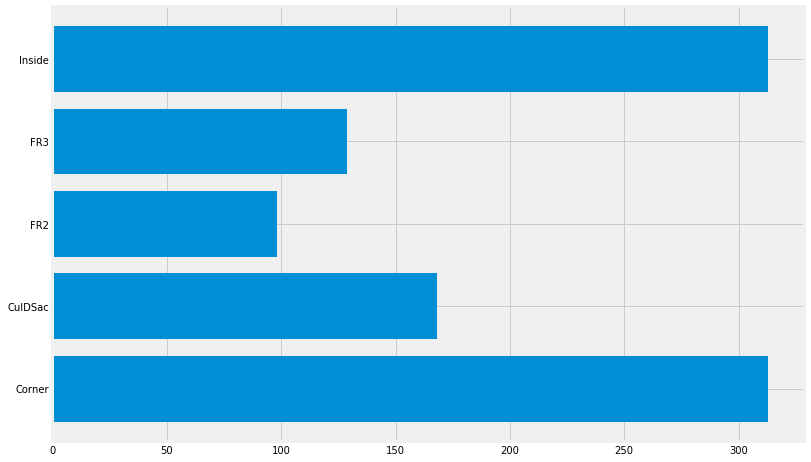

In [106]:
plt.barh(housing['LotConfig'], housing['LotFrontage'])